### Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data to a dataframe

In [2]:
sns.set_palette("Set2")

iris = pd.read_csv("data/Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualization

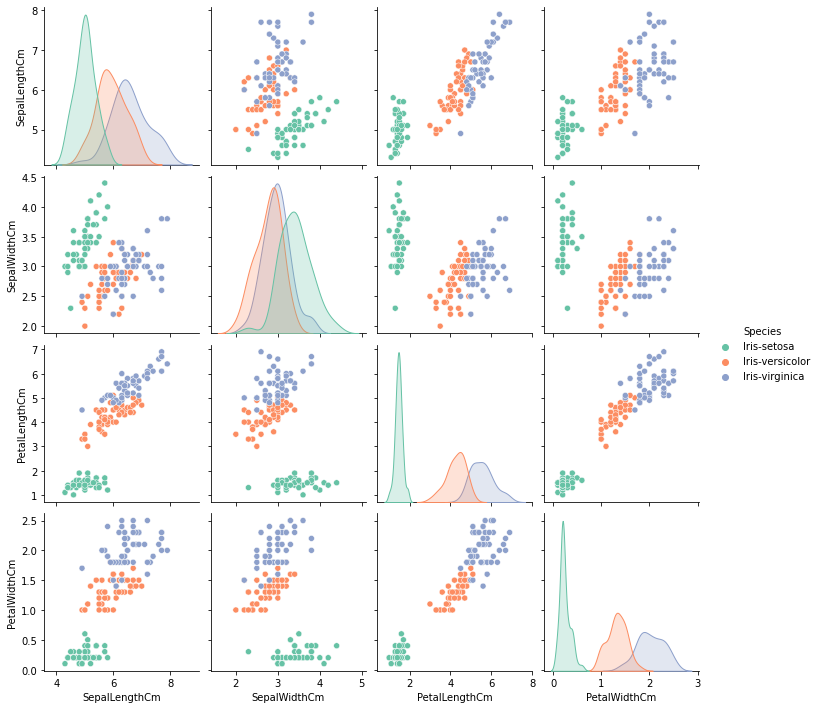

In [3]:
sns.pairplot(iris.drop(['Id'], axis=1), hue="Species")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

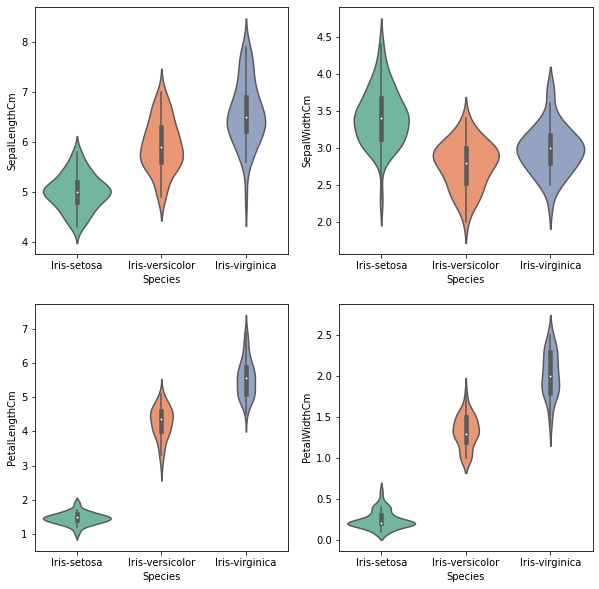

In [4]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 10))

sns.violinplot(x="Species", y="SepalLengthCm", data=iris, ax=ax1)
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, ax=ax2)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, ax=ax3)
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, ax=ax4)

### Using KNN ML Algorithm

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
# 1. declare the classifer
# n_neighbours is the number of closest neighbours we should consider when making a "vote"
knn = KNeighborsClassifier(n_neighbors = 3)

In [7]:
# 2. prepare the input variable x, and target output y
x,y = iris.drop(['Id','Species'],axis=1), iris['Species']

In [8]:
# 3. split the dataset into two parts, one for training, one for testing the model later
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [9]:
# 4. fit the model using the training data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# 5. make prediction with the input from test data
prediction = knn.predict(x_test)

In [11]:
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9777777777777777


### Using Naives Bayes ML Algorithm

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [13]:
nb = GaussianNB()

# x,y = iris.drop(['Id','Species'],axis=1), iris['Species']

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

nb.fit(x_train,y_train)
prediction = nb.predict(x_test)

print('With NB accuracy is: ',nb.score(x_test,y_test)) # accuracy

With NB accuracy is:  0.9333333333333333


### Using Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split

In [15]:
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.9555555555555556


In [16]:
from sklearn import tree

tree.export_graphviz(dtree, out_file="tree.dot")

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

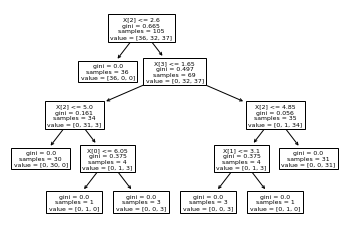

In [17]:
tree.plot_tree(dtree)

In [23]:
dtree = DecisionTreeClassifier(max_depth=7, min_samples_split=3, min_samples_leaf=7)
dtree.fit(x_train, y_train)
dtree.score(x_test,y_test)

0.9555555555555556

### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ',rf.score(x_test,y_test)) # accuracy


With Random Forest accuracy is:  0.9555555555555556


## Using Support Vector Machine

In [29]:
from sklearn.svm import SVC
import numpy as np

### Parameters of SVM
There are three main parameters which we could play with when constructing a SVM classifier:

- Type of kernel
- Gamma value
- C value

In [30]:
X,y = iris.iloc[:,1:3], pd.factorize(iris['Species'])[0]

# iris.drop(['Id','Species'],axis=1) #| iris.iloc[:,1:3]

# # Define the boundaries for the graphs we will draw later
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))


In [32]:
# Defining a function that declare a SVM classifier, with different parameters, and make predictions
def make_mesh(kerneltype, Cval, gammaval="auto"):
    svc = SVC(kernel=kerneltype, C=Cval,gamma=gammaval)
    svc.fit(X, y)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return (Z)

C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVC with linear kernel')

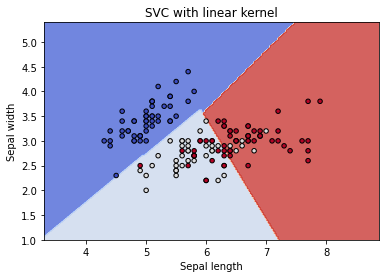

In [33]:
Z = make_mesh("linear", 1, gammaval="auto")
plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVC with rbf kernel')

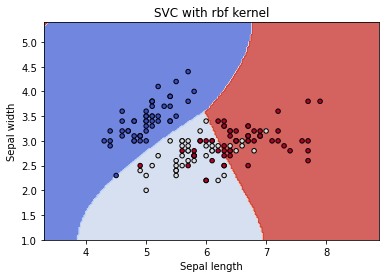

In [34]:
Z = make_mesh("rbf", 1, gammaval="auto")
plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')

C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Gamma = 100')

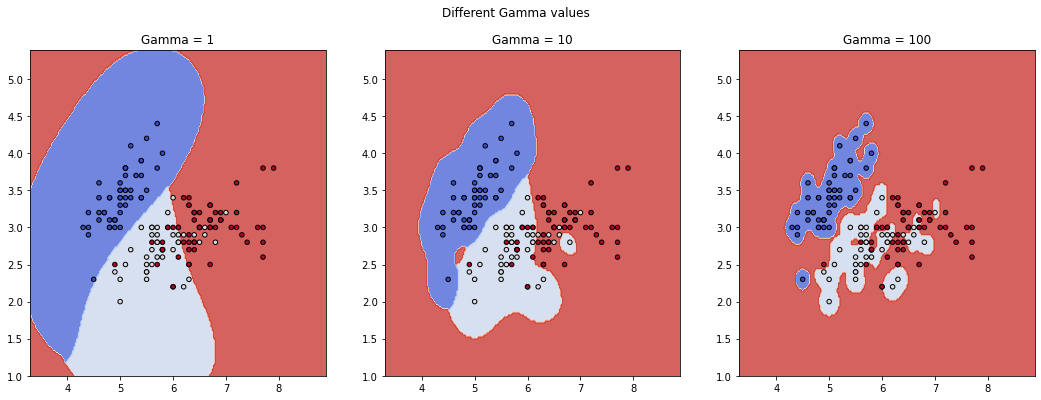

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Different Gamma values')

Z = make_mesh("rbf", 1, gammaval=1)
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_title("Gamma = 1")

Z = make_mesh("rbf", 1, gammaval=10)
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_title("Gamma = 10")

Z = make_mesh("rbf", 1, gammaval=100)
ax3.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax3.set_title("Gamma = 100")

C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'C = 100')

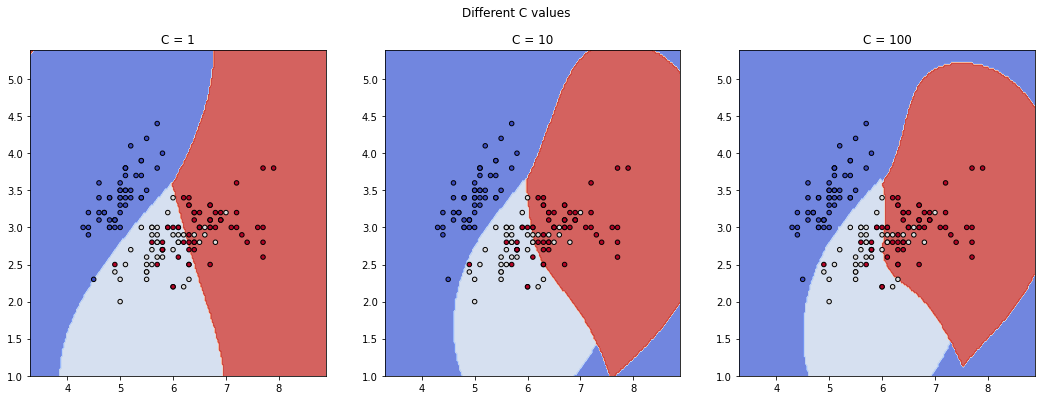

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Different C values')

Z = make_mesh("rbf", 1, gammaval="auto")
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_title("C = 1")

Z = make_mesh("rbf", 10, gammaval="auto")
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_title("C = 10")

Z = make_mesh("rbf", 100, gammaval="auto")
ax3.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax3.set_title("C = 100")
